In [34]:
#  Task 1: Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
import warnings
warnings.filterwarnings('ignore')


from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [35]:
#  Task 2: Load the Dataset
df = pd.read_excel(r"C:\Users\CS\Desktop\glass.xlsx", sheet_name='glass')
df


,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [36]:
# Preview the data
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [37]:
#   Explore the Dataset
print("Shape of dataset:", df.shape)
print("\nData types:\n", df.dtypes)
print("\nChecking null values:\n", df.isnull().sum())

# there is no missing values
# there is no categorical data

Shape of dataset: (214, 10)

Data types:
 RI      float64
Na      float64
Mg      float64
Al      float64
Si      float64
K       float64
Ca      float64
Ba      float64
Fe      float64
Type      int64
dtype: object

Checking null values:
 RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64


In [38]:
# Standardization
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_standardized = df.copy()
df_standardized[columns] = scaler.fit_transform(df[columns])

# Show before and after comparison
print("Before Standardization (first 5 rows):")
print(df_standardized[columns].head())

print("\nAfter Standardization (first 5 rows):")
print(df_standardized[columns].head())



Before Standardization (first 5 rows):
         RI        Na        Mg        Al        Si         K        Ca  \
0  0.872868  0.284953  1.254639 -0.692442 -1.127082 -0.671705 -0.145766   
1 -0.249333  0.591817  0.636168 -0.170460  0.102319 -0.026213 -0.793734   
2 -0.721318  0.149933  0.601422  0.190912  0.438787 -0.164533 -0.828949   
3 -0.232831 -0.242853  0.698710 -0.310994 -0.052974  0.112107 -0.519052   
4 -0.312045 -0.169205  0.650066 -0.411375  0.555256  0.081369 -0.624699   

         Ba        Fe      Type  
0 -0.352877 -0.586451 -0.848275  
1 -0.352877 -0.586451 -0.848275  
2 -0.352877 -0.586451 -0.848275  
3 -0.352877 -0.586451 -0.848275  
4 -0.352877 -0.586451 -0.848275  

After Standardization (first 5 rows):
         RI        Na        Mg        Al        Si         K        Ca  \
0  0.872868  0.284953  1.254639 -0.692442 -1.127082 -0.671705 -0.145766   
1 -0.249333  0.591817  0.636168 -0.170460  0.102319 -0.026213 -0.793734   
2 -0.721318  0.149933  0.601422  0.190912 

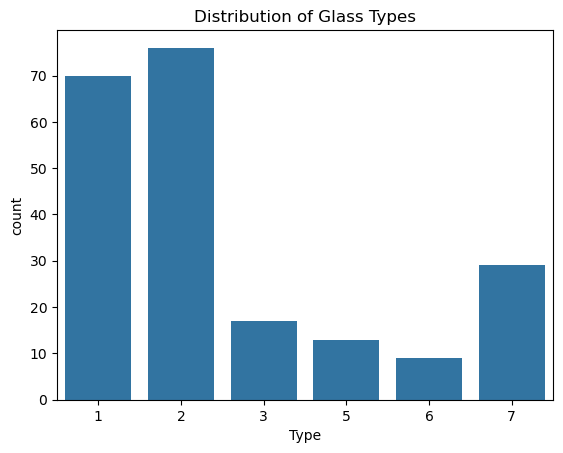

In [39]:
# Plot the distribution of classes
sns.countplot(x='Type', data=df)
plt.title("Distribution of Glass Types")
plt.show()

In [40]:
columns=df.columns
columns

Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type'], dtype='object')

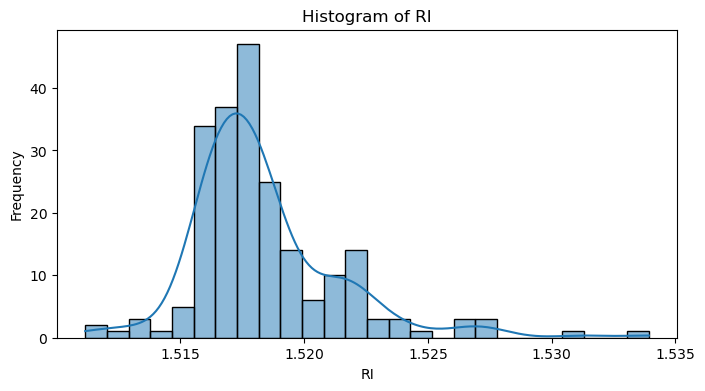

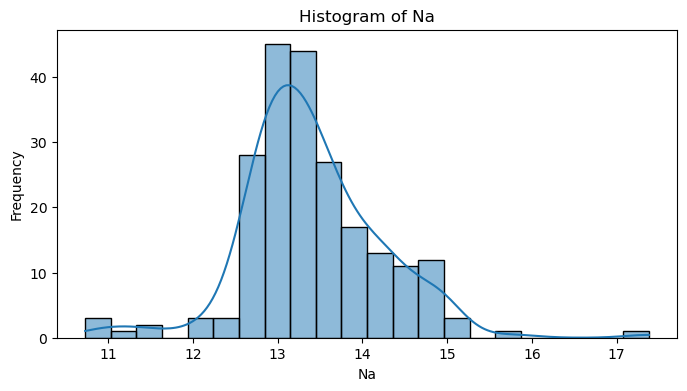

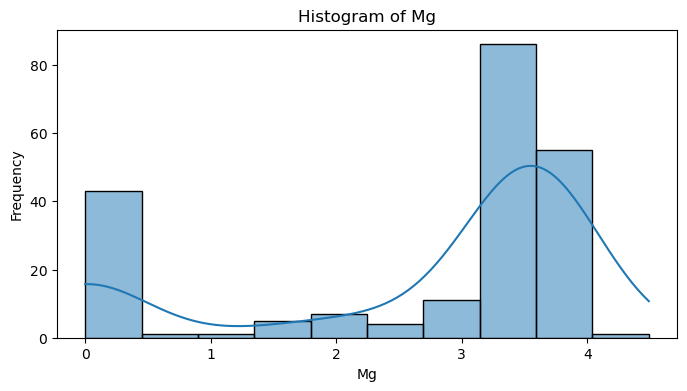

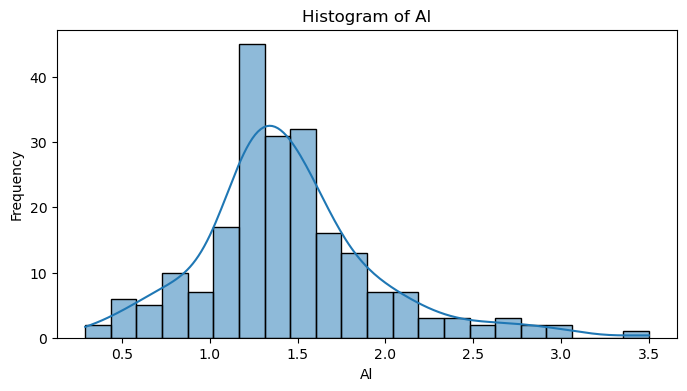

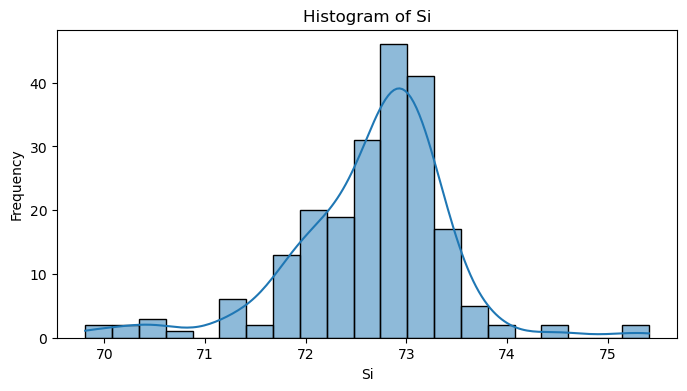

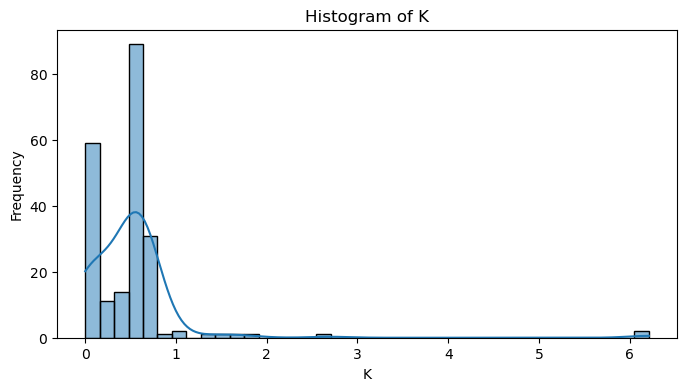

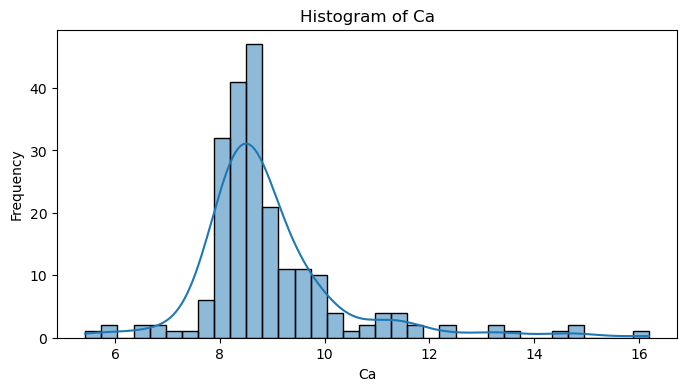

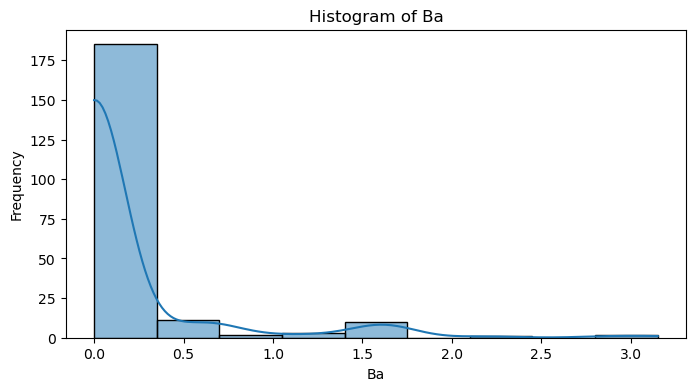

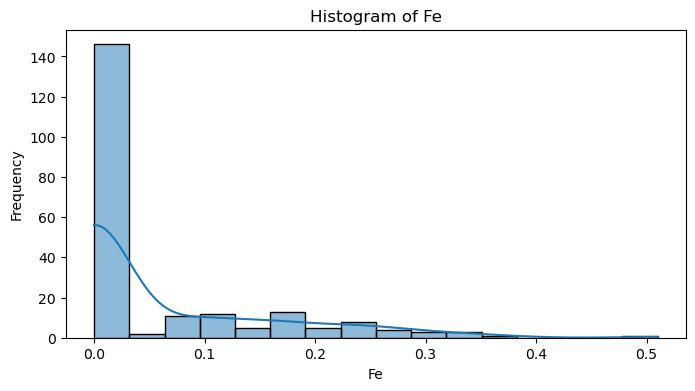

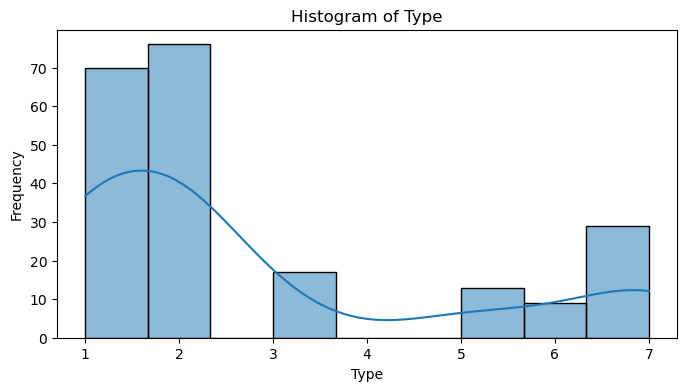

In [41]:
#:data visualization
#creating histogram model for data
import matplotlib.pyplot as plt
import seaborn as sns

for column in columns:
    plt.figure(figsize=(8,4))
    sns.histplot(df[column], kde=True)
    plt.title(f"Histogram of {column}")
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.show()
    

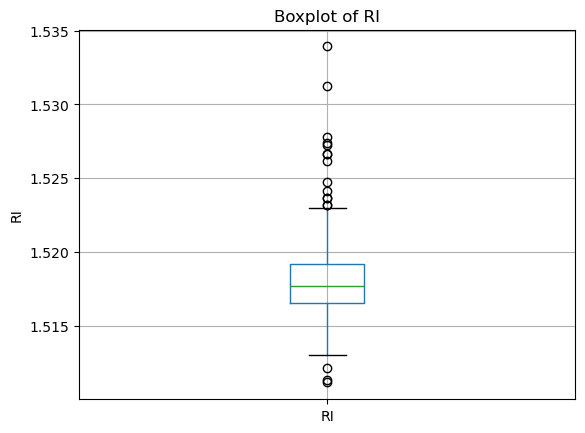

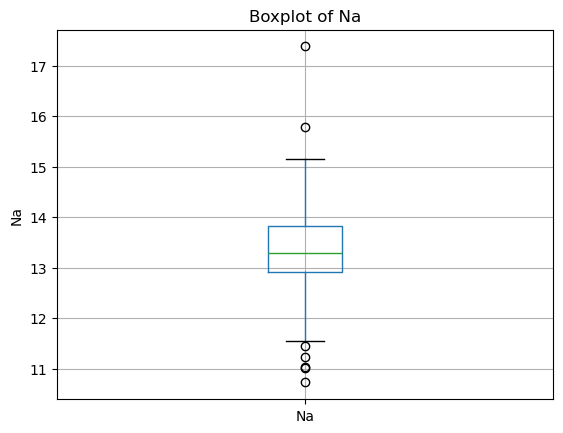

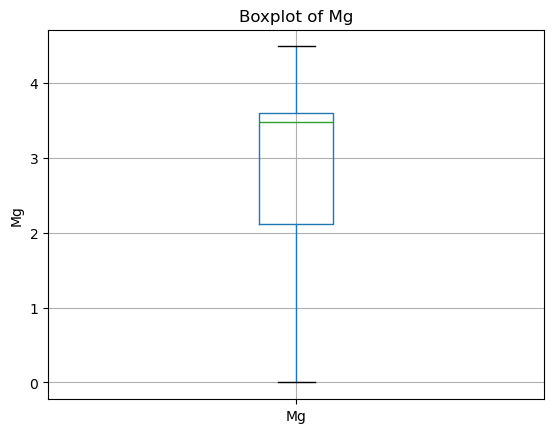

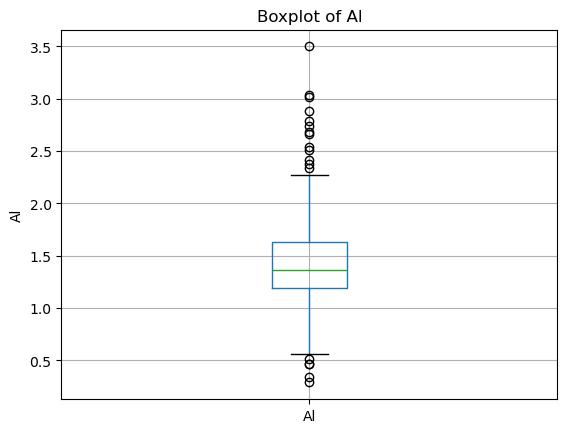

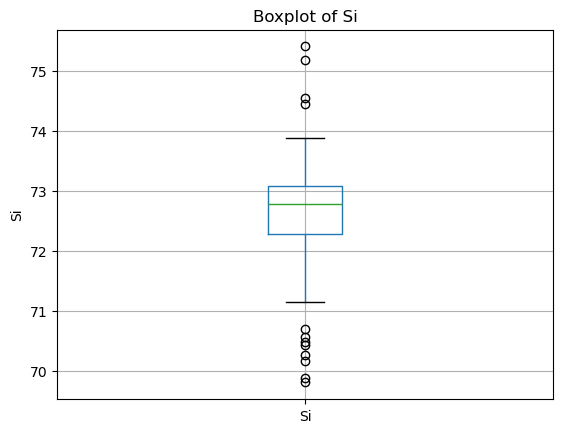

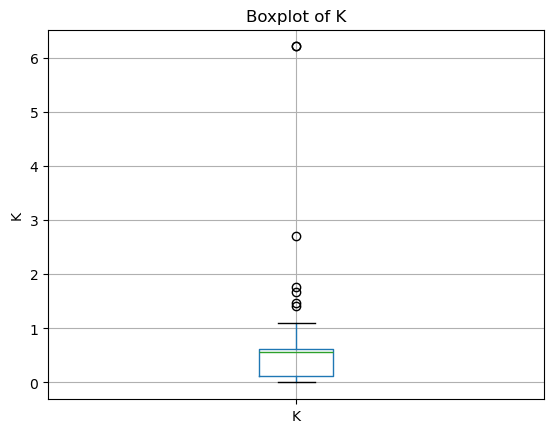

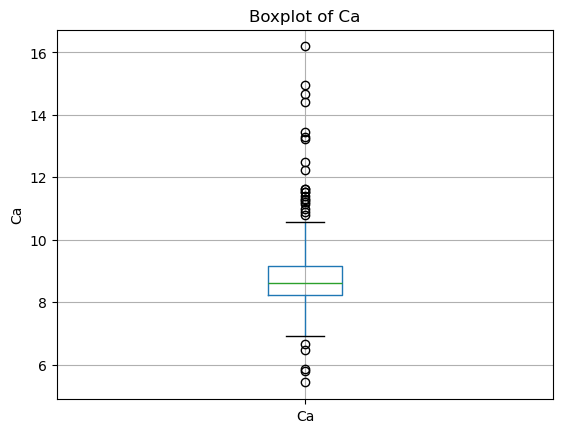

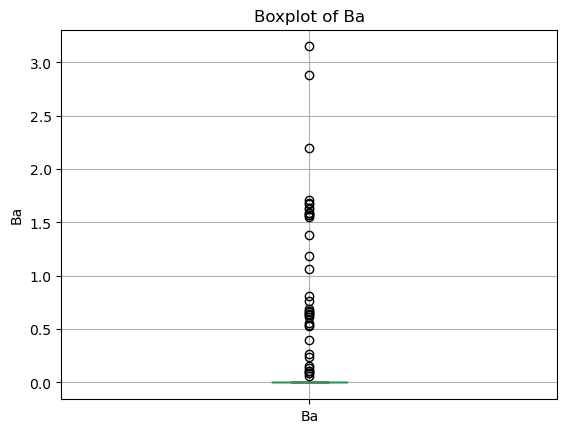

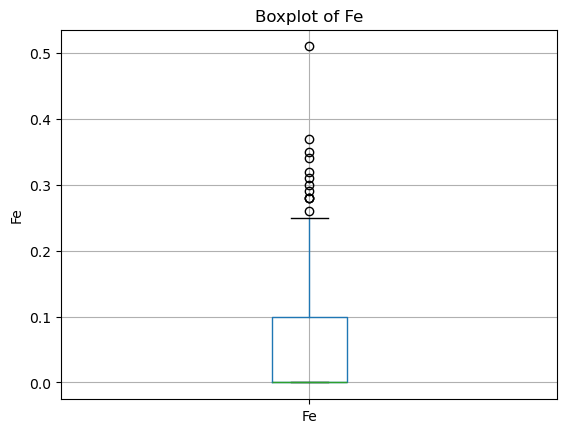

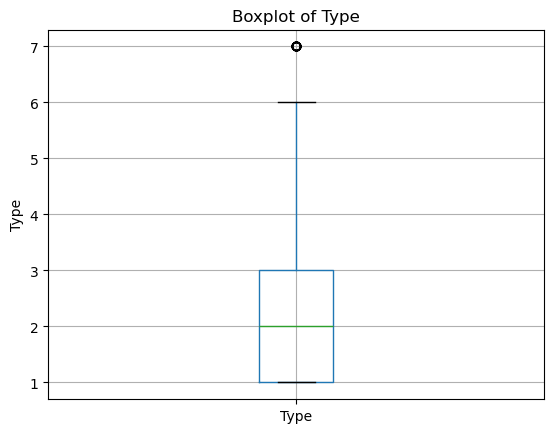

In [42]:
#boxplot for numerical columns
for col in columns:
    plt.figure()
    df.boxplot(column=col)
    plt.title(f"Boxplot of {col}")
    plt.ylabel(col)
    plt.show()
    print()

In [ ]:
#plotting pairplot 
sns.pairplot(df)
plt.show()


In [ ]:
#  Task 4: Split Features and Target
X = df.drop('Type', axis=1)
y = df['Type']

# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Training set:", X_train.shape)
print("Test set:", X_test.shape)


In [ ]:
#  Task 5: Train Random Forest Model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)



In [ ]:
#  Task 6: Evaluate the Model
y_pred = rf.predict(X_test)

print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


In [ ]:
#  Task 7: Feature Importance
importances = rf.feature_importances_
feature_names = X.columns



In [ ]:
# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=feature_names)
plt.title("Feature Importance from Random Forest")
plt.show()

In [ ]:
#  Task 8: Apply Bagging (with DecisionTreeClassifier)
from sklearn.tree import DecisionTreeClassifier

bagging_model = BaggingClassifier(
    estimator=DecisionTreeClassifier(),
    n_estimators=100,
    random_state=42
)

bagging_model.fit(X_train, y_train)
bagging_pred = bagging_model.predict(X_test)

print("Bagging Accuracy:", accuracy_score(y_test, bagging_pred))




In [ ]:
#  Task 9: Apply Boosting (AdaBoost)
boost_model = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=1),
    n_estimators=100,
    random_state=42
)

boost_model.fit(X_train, y_train)
boost_pred = boost_model.predict(X_test)

print("Boosting Accuracy:", accuracy_score(y_test, boost_pred))




In [ ]:
#  Task 10: Compare All Models
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred))
print("Bagging Accuracy:", accuracy_score(y_test, bagging_pred))
print("Boosting Accuracy:", accuracy_score(y_test, boost_pred))



In [ ]:
# Bagging Model
from sklearn.ensemble import BaggingClassifier, GradientBoostingClassifier
from sklearn.metrics import precision_score, recall_score, f1_score
bagging_model = BaggingClassifier(random_state=42)
bagging_model.fit(X_train, y_train)
y_pred_bag = bagging_model.predict(X_test)

# Boosting Model
boosting_model = GradientBoostingClassifier(random_state=42)
boosting_model.fit(X_train, y_train)
y_pred_boost = boosting_model.predict(X_test)

# Evaluation Metrics
print("=== Bagging Model Metrics ===")
print("Precision:", precision_score(y_test, y_pred_bag, average='macro'))
print("Recall:", recall_score(y_test, y_pred_bag, average='macro'))
print("F1-Score:", f1_score(y_test, y_pred_bag, average='macro'))

print("\n=== Boosting Model Metrics ===")
print("Precision:", precision_score(y_test, y_pred_boost, average='macro'))
print("Recall:", recall_score(y_test, y_pred_boost, average='macro'))
print("F1-Score:", f1_score(y_test, y_pred_boost, average='macro'))


In [ ]:
#Interview questions
#1. Explain Bagging and Boosting methods. How is it different from each other.
# Bagging (Bootstrap Aggregating):
# - Trains multiple models independently in parallel using random subsets of the data (with replacement).
# - Final prediction is made by averaging (for regression) or majority voting (for classification).
# - Reduces variance and helps prevent overfitting.
# - Example: Random Forest

# Boosting:
# - Trains models sequentially, where each model focuses on correcting the errors of the previous ones.
# - Models are combined in a weighted manner to form the final prediction.
# - Reduces bias and improves accuracy, but can be more prone to overfitting if not regularized.
# - Example: AdaBoost, Gradient Boosting, XGBoost

# Key Differences:
# - Bagging builds models independently; Boosting builds them sequentially.
# - Bagging reduces variance; Boosting reduces bias.
# - Bagging is more stable; Boosting is often more accurate but requires tuning to avoid overfitting.


In [30]:
#2. Explain how to handle imbalance in the data. can ans it aboove format
# Common Techniques:

# - Resampling Methods:
#   - Undersampling: Reduce the majority class to match the minority class.
#   - Oversampling: Increase the minority class by duplicating samples or generating synthetic ones 

# - Algorithmic Approaches:
#   - Use models that support class weighting (e.g., Logistic Regression, Random Forest).
#   - Adjust the decision threshold to favor the minority class.

# - Evaluation Metrics:
#   - Use metrics that are more informative than accuracy, such as:
#     - Precision, Recall, F1-Score
#     - ROC-AUC, PR-AUC
#     - Confusion Matrix

# Best Practice:
# - Combine multiple techniques for better results (e.g., SMOTE + class weights).
# - Always evaluate with proper metrics, especially when classes are highly imbalanced.
